<a href="https://colab.research.google.com/github/samikshagadhave/YOLOv6_insulator_data-/blob/main/YOLOv6_with_incorrect_predictions_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/meituan/YOLOv6

%cd YOLOv6
!pip install -r requirements.txt


Cloning into 'YOLOv6'...
remote: Enumerating objects: 2893, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 2893 (delta 60), reused 100 (delta 45), pack-reused 2762
Receiving objects: 100% (2893/2893), 44.05 MiB | 16.29 MiB/s, done.
Resolving deltas: 100% (1623/1623), done.
/content/YOLOv6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 94.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mwbsdPvkmXbwf9oRwN1g")
project = rf.workspace("samiksha-gadhave-oyljr").project("normal-insulator-defect-insulator-defects-1")
dataset = project.version(2).download("mt-yolov6")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.1 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=c85248353422e1d6fd96af1cfbcf8c8e7c9aaaa4ec6b65186fc41328806225d8
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypars

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Normal-Insulator,-Defect-Insulator,-Defects--1-2 in mt-yolov6:: 100%|██████████| 2197/2197 [00:00<00:00, 3351.26it/s]


In [ ]:
!python tools/train.py --batch 32 --conf configs/yolov6s.py --epochs 100 --img-size 416 --data {dataset.location}/data.yaml --device 0

Using 1 GPU for training... 
training args are: Namespace(batch_size=32, bs_per_gpu=32, calib=False, check_images=False, check_labels=False, conf_file='configs/yolov6s.py', data_path='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml', device='0', dist_url='env://', distill=False, distill_feat=False, epochs=100, eval_final_only=False, eval_interval=20, fuse_ab=False, gpu_count=0, heavy_eval_range=50, img_size=416, local_rank=-1, name='exp', output_dir='./runs/train', quant=False, rank=-1, resume=False, save_ckpt_on_last_n_epoch=-1, save_dir='runs/train/exp', stop_aug_last_n_epoch=15, teacher_model_path=None, temperature=20, workers=8, world_size=1, write_trainbatch_tb=False)

Train: Checking formats of images with 2 process(es): 
0 image(s) corrupted: 100% 763/763 [00:00<00:00, 3535.41it/s]
Train: Checking formats of labels with 2 process(es): 
763 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 763/763 [00:00<00:00, 3580.28it/

In [ ]:
!python tools/eval.py --data {dataset.location}/data.yaml --img-size 416 --weights runs/train/exp/weights/best_ckpt.pt --device 0

Namespace(batch_size=32, conf_thres=0.03, config_file='', data='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml', device='0', do_coco_metric=True, do_pr_metric=False, eval_config_file='./configs/experiment/eval_640_repro.py', force_no_pad=False, half=False, img_size=416, iou_thres=0.65, letterbox_return_int=False, name='exp', not_infer_on_rect=False, plot_confusion_matrix=False, plot_curve=True, reproduce_640_eval=False, save_dir='runs/val/', scale_exact=False, task='val', test_load_size=640, verbose=False, weights='runs/train/exp/weights/best_ckpt.pt')
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy mo

In [ ]:
!mkdir save_images_test

In [ ]:
!python tools/infer.py  --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt   --source {dataset.location}/images/test/0135_jpg.rf.bb6d5f68a6bfcefb56263f7089cc50a4.jpg    --device 0  --conf-thres 0.11

Namespace(agnostic_nms=False, classes=None, conf_thres=0.11, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images/test/0135_jpg.rf.bb6d5f68a6bfcefb56263f7089cc50a4.jpg', view_img=False, webcam=False, webcam_addr='0', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # t

In [ ]:
!python tools/infer.py  --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt   --source {dataset.location}/images/test/099_jpg.rf.a7f7a0255022a2c40019d0bd4a4fdffb.jpg    --device 0 --conf-thres 0.37

Namespace(agnostic_nms=False, classes=None, conf_thres=0.37, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images/test/099_jpg.rf.a7f7a0255022a2c40019d0bd4a4fdffb.jpg', view_img=False, webcam=False, webcam_addr='0', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # ty

In [ ]:
!python tools/infer.py  --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt   --source {dataset.location}/images/test/140_jpg.rf.e7ac8577eb47d56e224eab4f5ff4a864.jpg    --device 0  --conf-thres 0.3

Namespace(agnostic_nms=False, classes=None, conf_thres=0.3, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images/test/140_jpg.rf.e7ac8577eb47d56e224eab4f5ff4a864.jpg', view_img=False, webcam=False, webcam_addr='0', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # typ

In [ ]:
!python tools/infer.py  --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt   --source {dataset.location}/images/test/188_jpg.rf.5da906adbbad8eeeae3945f3839a2d40.jpg    --device 0 --conf-thres 0.2

Namespace(agnostic_nms=False, classes=None, conf_thres=0.2, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images/test/188_jpg.rf.5da906adbbad8eeeae3945f3839a2d40.jpg', view_img=False, webcam=False, webcam_addr='0', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # typ

In [ ]:
!python tools/infer.py  --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt   --source {dataset.location}/images/test/212_jpg.rf.706756ab5b72627dd4853c72673889ef.jpg    --device 0 --conf-thres 0.29

Namespace(agnostic_nms=False, classes=None, conf_thres=0.29, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images/test/212_jpg.rf.706756ab5b72627dd4853c72673889ef.jpg', view_img=False, webcam=False, webcam_addr='0', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # ty

In [ ]:
!python tools/infer.py  --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt   --source {dataset.location}/images/test/218_jpg.rf.acb6045517efeedf39be150607cc96a0.jpg    --device 0  --conf-thres 0.35

Namespace(agnostic_nms=False, classes=None, conf_thres=0.35, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images/test/218_jpg.rf.acb6045517efeedf39be150607cc96a0.jpg', view_img=False, webcam=False, webcam_addr='0', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # ty

In [ ]:
!python tools/infer.py  --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt   --source {dataset.location}/images/test/234_jpg.rf.6e09adf1b02ffe0d2da1ad72f697a611.jpg    --device 0 --conf-thres 0.3

Namespace(agnostic_nms=False, classes=None, conf_thres=0.42, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images/test/234_jpg.rf.6e09adf1b02ffe0d2da1ad72f697a611.jpg', view_img=False, webcam=False, webcam_addr='0', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # ty

In [ ]:
!python tools/infer.py  --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt   --source {dataset.location}/images/test/239_jpg.rf.27d2c3f42fd4b48a9bee6874d4d4ceb6.jpg    --device 0  --conf-thres 0.25

Namespace(agnostic_nms=False, classes=None, conf_thres=0.25, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images/test/239_jpg.rf.27d2c3f42fd4b48a9bee6874d4d4ceb6.jpg', view_img=False, webcam=False, webcam_addr='0', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # ty

In [ ]:
!python tools/infer.py  --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt   --source {dataset.location}/images/test/1797_jpg.rf.2b6f9754e1875e2d6eeedba005345280.jpg    --device 0 --conf-thres 0.42

Namespace(agnostic_nms=False, classes=None, conf_thres=0.42, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images/test/1797_jpg.rf.2b6f9754e1875e2d6eeedba005345280.jpg', view_img=False, webcam=False, webcam_addr='0', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # t

In [ ]:
!python tools/infer.py  --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt   --source {dataset.location}/images/test/3075_jpg.rf.b55d613631107a42aa0391f1d55d85f3.jpg    --device 0 --conf-thres 0.42

Namespace(agnostic_nms=False, classes=None, conf_thres=0.42, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images/test/3075_jpg.rf.b55d613631107a42aa0391f1d55d85f3.jpg', view_img=False, webcam=False, webcam_addr='0', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # t

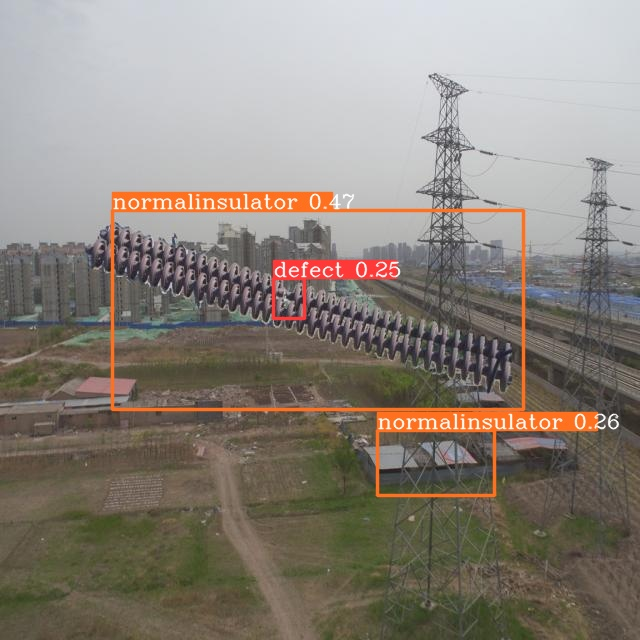

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/188_jpg.rf.5da906adbbad8eeeae3945f3839a2d40.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
import cv2
import os
import random
label_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels'
raw_images_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images'
save_images_folder = r'/content/YOLOv6/save_images_test'
name_list_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid'
classes_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2'
image_name=r'./runs/inference/exp/0135_jpg.rf.bb6d5f68a6bfcefb56263f7089cc50a4.jpg'
label=name_of_class='normalinsulator'

def plot_one_box(x, image, color=None, label=name_of_class,line_thickness=None):

    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(str(label), 0, fontScale=tl / 3,thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, str(label), (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
def draw_box_on_image(image_name, classes_path, label_folder, raw_images_folder, save_images_folder ):
    txt_path  = r"/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/test/0135_jpg.rf.bb6d5f68a6bfcefb56263f7089cc50a4.txt"
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = r"./runs/inference/exp/0135_jpg.rf.bb6d5f68a6bfcefb56263f7089cc50a4.jpg"
    save_file_path = r"/content/YOLOv6/save_images_test/0135"
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0
    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])
        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)
        plot_one_box([x1,y1,x2,y2], image,  label=name_of_class, line_thickness=None)
        cv2.imwrite(r"/content/YOLOv6/save_images_test/0135.jpg",image)
        box_number += 1
        return box_number
draw_box_on_image(image_name, classes_path,  label_folder, raw_images_folder, save_images_folder )





./runs/inference/exp/0135_jpg.rf.bb6d5f68a6bfcefb56263f7089cc50a4.jpg


1

In [ ]:
import cv2
import os
import random
label_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels'
raw_images_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images'
save_images_folder = r'/content/YOLOv6/save_images_test'
name_list_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid'
classes_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2'
image_name=r'./runs/inference/exp/099_jpg.rf.a7f7a0255022a2c40019d0bd4a4fdffb.jpg'
label=name_of_class='defect'

def plot_one_box(x, image, color=None, label=name_of_class,line_thickness=None):

    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(str(label), 0, fontScale=tl / 3,thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, str(label), (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
def draw_box_on_image(image_name, classes_path, label_folder, raw_images_folder, save_images_folder ):
    txt_path  = r"/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/test/099_jpg.rf.a7f7a0255022a2c40019d0bd4a4fdffb.txt"
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = r"./runs/inference/exp/099_jpg.rf.a7f7a0255022a2c40019d0bd4a4fdffb.jpg"
    save_file_path = r"/content/YOLOv6/save_images_test/099"
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0
    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])
        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)
        plot_one_box([x1,y1,x2,y2], image,  label=name_of_class, line_thickness=None)
        cv2.imwrite(r"/content/YOLOv6/save_images_test/099.jpg",image)
        box_number += 1
        return box_number
draw_box_on_image(image_name, classes_path,  label_folder, raw_images_folder, save_images_folder )





./runs/inference/exp/099_jpg.rf.a7f7a0255022a2c40019d0bd4a4fdffb.jpg


1

In [ ]:
import cv2
import os
import random
label_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels'
raw_images_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images'
save_images_folder = r'/content/YOLOv6/save_images_test'
name_list_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid'
classes_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2'
image_name=r'./runs/inference/exp/140_jpg.rf.e7ac8577eb47d56e224eab4f5ff4a864.jpg'
label=name_of_class='defective insulator'

def plot_one_box(x, image, color=None, label=name_of_class,line_thickness=None):

    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(str(label), 0, fontScale=tl / 3,thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, str(label), (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
def draw_box_on_image(image_name, classes_path, label_folder, raw_images_folder, save_images_folder ):
    txt_path  = r"/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/test/140_jpg.rf.e7ac8577eb47d56e224eab4f5ff4a864.txt"
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = r"./runs/inference/exp/140_jpg.rf.e7ac8577eb47d56e224eab4f5ff4a864.jpg"
    save_file_path = r"/content/YOLOv6/save_images_test/140"
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0
    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])
        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)
        plot_one_box([x1,y1,x2,y2], image,  label=name_of_class, line_thickness=None)
        cv2.imwrite(r"/content/YOLOv6/save_images_test/140.jpg",image)
        box_number += 1
        return box_number
draw_box_on_image(image_name, classes_path,  label_folder, raw_images_folder, save_images_folder )





./runs/inference/exp/140_jpg.rf.e7ac8577eb47d56e224eab4f5ff4a864.jpg


1

In [ ]:
import cv2
import os
import random
label_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels'
raw_images_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images'
save_images_folder = r'/content/YOLOv6/save_images_test'
name_list_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid'
classes_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2'
image_name=r'./runs/inference/exp/188_jpg.rf.5da906adbbad8eeeae3945f3839a2d40.jpg'
label=name_of_class='defect'

def plot_one_box(x, image, color=None, label=name_of_class,line_thickness=None):

    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(str(label), 0, fontScale=tl / 3,thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, str(label), (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
def draw_box_on_image(image_name, classes_path, label_folder, raw_images_folder, save_images_folder ):
    txt_path  = r"/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/test/188_jpg.rf.5da906adbbad8eeeae3945f3839a2d40.txt"
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = r"./runs/inference/exp/188_jpg.rf.5da906adbbad8eeeae3945f3839a2d40.jpg"
    save_file_path = r"/content/YOLOv6/save_images_test/188"
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0
    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])
        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)
        plot_one_box([x1,y1,x2,y2], image,  label=name_of_class, line_thickness=None)
        cv2.imwrite(r"/content/YOLOv6/save_images_test/188.jpg",image)
        box_number += 1
        return box_number
draw_box_on_image(image_name, classes_path,  label_folder, raw_images_folder, save_images_folder )





./runs/inference/exp/188_jpg.rf.5da906adbbad8eeeae3945f3839a2d40.jpg


1

In [ ]:
import cv2
import os
import random
label_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels'
raw_images_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images'
save_images_folder = r'/content/YOLOv6/save_images_test'
name_list_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid'
classes_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2'
image_name=r'./runs/inference/exp/212_jpg.rf.706756ab5b72627dd4853c72673889ef.jpg'
label=name_of_class='defect'

def plot_one_box(x, image, color=None, label=name_of_class,line_thickness=None):

    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(str(label), 0, fontScale=tl / 3,thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, str(label), (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
def draw_box_on_image(image_name, classes_path, label_folder, raw_images_folder, save_images_folder ):
    txt_path  = r"/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/test/212_jpg.rf.706756ab5b72627dd4853c72673889ef.txt"
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = r"./runs/inference/exp/212_jpg.rf.706756ab5b72627dd4853c72673889ef.jpg"
    save_file_path = r"/content/YOLOv6/save_images_test/212"
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0
    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])
        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)
        plot_one_box([x1,y1,x2,y2], image,  label=name_of_class, line_thickness=None)
        cv2.imwrite(r"/content/YOLOv6/save_images_test/212.jpg",image)
        box_number += 1
        return box_number
draw_box_on_image(image_name, classes_path,  label_folder, raw_images_folder, save_images_folder )





./runs/inference/exp/212_jpg.rf.706756ab5b72627dd4853c72673889ef.jpg


1

In [ ]:
import cv2
import os
import random
label_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels'
raw_images_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images'
save_images_folder = r'/content/YOLOv6/save_images_test'
name_list_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid'
classes_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2'
image_name=r'./runs/inference/exp/218_jpg.rf.acb6045517efeedf39be150607cc96a0.jpg'
label=name_of_class='defect'

def plot_one_box(x, image, color=None, label=name_of_class,line_thickness=None):

    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(str(label), 0, fontScale=tl / 3,thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, str(label), (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
def draw_box_on_image(image_name, classes_path, label_folder, raw_images_folder, save_images_folder ):
    txt_path  = r"/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/test/218_jpg.rf.acb6045517efeedf39be150607cc96a0.txt"
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = r"./runs/inference/exp/218_jpg.rf.acb6045517efeedf39be150607cc96a0.jpg"
    save_file_path = r"/content/YOLOv6/save_images_test/218"
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0
    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])
        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)
        plot_one_box([x1,y1,x2,y2], image,  label=name_of_class, line_thickness=None)
        cv2.imwrite(r"/content/YOLOv6/save_images_test/218.jpg",image)
        box_number += 1
        return box_number
draw_box_on_image(image_name, classes_path,  label_folder, raw_images_folder, save_images_folder )





./runs/inference/exp/218_jpg.rf.acb6045517efeedf39be150607cc96a0.jpg


1

In [ ]:
import cv2
import os
import random
label_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels'
raw_images_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images'
save_images_folder = r'/content/YOLOv6/save_images_test'
name_list_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid'
classes_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2'
image_name=r'./runs/inference/exp/234_jpg.rf.6e09adf1b02ffe0d2da1ad72f697a611.jpg'
label=name_of_class='defect'

def plot_one_box(x, image, color=None, label=name_of_class,line_thickness=None):

    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(str(label), 0, fontScale=tl / 3,thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, str(label), (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
def draw_box_on_image(image_name, classes_path, label_folder, raw_images_folder, save_images_folder ):
    txt_path  = r"/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/test/234_jpg.rf.6e09adf1b02ffe0d2da1ad72f697a611.txt"
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = r"./runs/inference/exp/234_jpg.rf.6e09adf1b02ffe0d2da1ad72f697a611.jpg"
    save_file_path = r"/content/YOLOv6/save_images_test/234"
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0
    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])
        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)
        plot_one_box([x1,y1,x2,y2], image,  label=name_of_class, line_thickness=None)
        cv2.imwrite(r"/content/YOLOv6/save_images_test/234.jpg",image)
        box_number += 1
        return box_number
draw_box_on_image(image_name, classes_path,  label_folder, raw_images_folder, save_images_folder )





./runs/inference/exp/234_jpg.rf.6e09adf1b02ffe0d2da1ad72f697a611.jpg


1

In [ ]:
import cv2
import os
import random
label_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels'
raw_images_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images'
save_images_folder = r'/content/YOLOv6/save_images_test'
name_list_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid'
classes_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2'
image_name=r'./runs/inference/exp/239_jpg.rf.27d2c3f42fd4b48a9bee6874d4d4ceb6.jpg'
label=name_of_class='defect'

def plot_one_box(x, image, color=None, label=name_of_class,line_thickness=None):

    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(str(label), 0, fontScale=tl / 3,thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, str(label), (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
def draw_box_on_image(image_name, classes_path, label_folder, raw_images_folder, save_images_folder ):
    txt_path  = r"/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/test/239_jpg.rf.27d2c3f42fd4b48a9bee6874d4d4ceb6.txt"
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = r"./runs/inference/exp/239_jpg.rf.27d2c3f42fd4b48a9bee6874d4d4ceb6.jpg"
    save_file_path = r"/content/YOLOv6/save_images_test/239"
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0
    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])
        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)
        plot_one_box([x1,y1,x2,y2], image,  label=name_of_class, line_thickness=None)
        cv2.imwrite(r"/content/YOLOv6/save_images_test/239.jpg",image)
        box_number += 1
        return box_number
draw_box_on_image(image_name, classes_path,  label_folder, raw_images_folder, save_images_folder )





./runs/inference/exp/239_jpg.rf.27d2c3f42fd4b48a9bee6874d4d4ceb6.jpg


1

In [ ]:
import cv2
import os
import random
label_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels'
raw_images_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images'
save_images_folder = r'/content/YOLOv6/save_images_test'
name_list_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid'
classes_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2'
image_name=r'./runs/inference/exp/1797_jpg.rf.2b6f9754e1875e2d6eeedba005345280.jpg'
label=name_of_class='normalinsulator'

def plot_one_box(x, image, color=None, label=name_of_class,line_thickness=None):

    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(str(label), 0, fontScale=tl / 3,thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, str(label), (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
def draw_box_on_image(image_name, classes_path, label_folder, raw_images_folder, save_images_folder ):
    txt_path  = r"/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/test/1797_jpg.rf.2b6f9754e1875e2d6eeedba005345280.txt"
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = r"./runs/inference/exp/1797_jpg.rf.2b6f9754e1875e2d6eeedba005345280.jpg"
    save_file_path = r"/content/YOLOv6/save_images_test/1797"
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0
    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])
        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)
        plot_one_box([x1,y1,x2,y2], image,  label=name_of_class, line_thickness=None)
        cv2.imwrite(r"/content/YOLOv6/save_images_test/1797.jpg",image)
        box_number += 1
        return box_number
draw_box_on_image(image_name, classes_path,  label_folder, raw_images_folder, save_images_folder )





./runs/inference/exp/1797_jpg.rf.2b6f9754e1875e2d6eeedba005345280.jpg


1

In [ ]:
import cv2
import os
import random
label_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels'
raw_images_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images'
save_images_folder = r'/content/YOLOv6/save_images_test'
name_list_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid'
classes_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2'
image_name=r'./runs/inference/exp/3075_jpg.rf.b55d613631107a42aa0391f1d55d85f3.jpg'
label=name_of_class='normalinsulator'

def plot_one_box(x, image, color=None, label=name_of_class,line_thickness=None):

    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(str(label), 0, fontScale=tl / 3,thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, str(label), (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
def draw_box_on_image(image_name, classes_path, label_folder, raw_images_folder, save_images_folder ):
    txt_path  = r"/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/test/3075_jpg.rf.b55d613631107a42aa0391f1d55d85f3.txt"
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = r"./runs/inference/exp/3075_jpg.rf.b55d613631107a42aa0391f1d55d85f3.jpg"
    save_file_path = r"/content/YOLOv6/save_images_test/3075"
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0
    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])
        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)
        plot_one_box([x1,y1,x2,y2], image,  label=name_of_class, line_thickness=None)
        cv2.imwrite(r"/content/YOLOv6/save_images_test/3075.jpg",image)
        box_number += 1
        return box_number
draw_box_on_image(image_name, classes_path,  label_folder, raw_images_folder, save_images_folder )





./runs/inference/exp/3075_jpg.rf.b55d613631107a42aa0391f1d55d85f3.jpg


1

In [ ]:
!python tools/infer.py  --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt   --source {dataset.location}/images/valid/013_jpg.rf.47dfcecdc0fcfbe460829dcf34fafffd.jpg   --device 0 --conf-thres 0.34

Namespace(agnostic_nms=False, classes=None, conf_thres=0.34, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images/valid/013_jpg.rf.47dfcecdc0fcfbe460829dcf34fafffd.jpg', view_img=False, webcam=False, webcam_addr='0', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # t

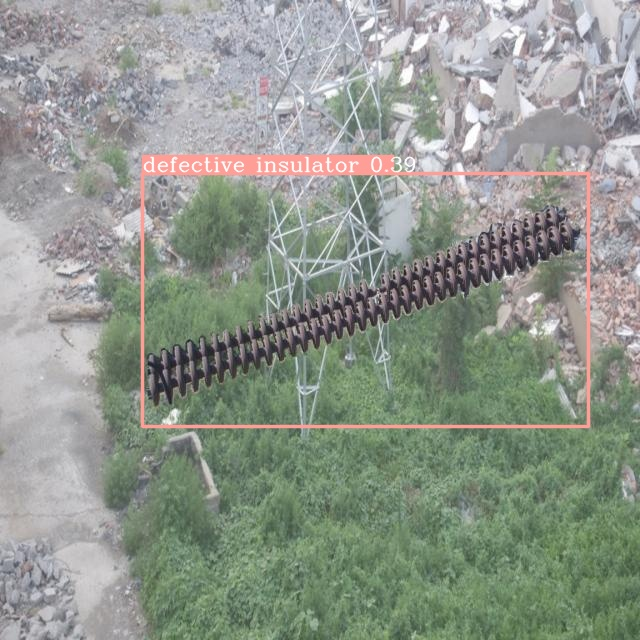

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/013_jpg.rf.47dfcecdc0fcfbe460829dcf34fafffd.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!mkdir save_images_valid

In [ ]:
import cv2
import os
import random
label_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels'
raw_images_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images'
save_images_folder = r'/content/YOLOv6/save_images_valid'
name_list_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid'
classes_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2'
image_name=r'./runs/inference/exp/013_jpg.rf.47dfcecdc0fcfbe460829dcf34fafffd.jpg'
label=name_of_class='defective insulator'

def plot_one_box(x, image, color=None, label=name_of_class,line_thickness=None):

    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(str(label), 0, fontScale=tl / 3,thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, str(label), (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
def draw_box_on_image(image_name, classes_path, label_folder, raw_images_folder, save_images_folder ):
    txt_path  = r"/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid/013_jpg.rf.47dfcecdc0fcfbe460829dcf34fafffd.txt"
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = r"./runs/inference/exp/013_jpg.rf.47dfcecdc0fcfbe460829dcf34fafffd.jpg"
    save_file_path = r"/content/YOLOv6/save_images_valid/013"
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0
    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])
        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)
        plot_one_box([x1,y1,x2,y2], image,  label=name_of_class, line_thickness=None)
        cv2.imwrite(r"/content/YOLOv6/save_images_valid/013.jpg",image)
        box_number += 1
        return box_number
draw_box_on_image(image_name, classes_path,  label_folder, raw_images_folder, save_images_folder )





./runs/inference/exp/013_jpg.rf.47dfcecdc0fcfbe460829dcf34fafffd.jpg


1

In [ ]:
!python tools/infer.py  --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt   --source {dataset.location}/images/valid/020_jpg.rf.4af612c145bcebc0a286e798140acd54.jpg   --device 0 --conf-thres 0.34

Namespace(agnostic_nms=False, classes=None, conf_thres=0.34, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images/valid/020_jpg.rf.4af612c145bcebc0a286e798140acd54.jpg', view_img=False, webcam=False, webcam_addr='0', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # t

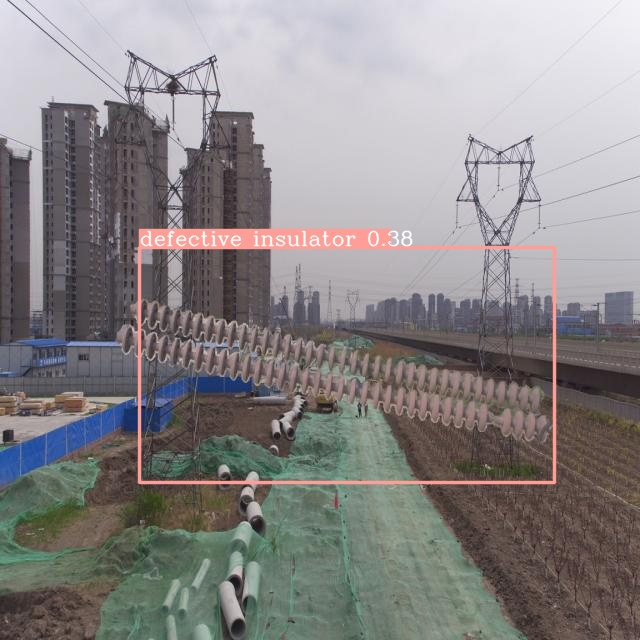

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/020_jpg.rf.4af612c145bcebc0a286e798140acd54.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
import cv2
import os
import random
label_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels'
raw_images_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images'
save_images_folder = r'/content/YOLOv6/save_images_valid'
name_list_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid'
classes_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2'
image_name=r'./runs/inference/exp/020_jpg.rf.4af612c145bcebc0a286e798140acd54.jpg'
label=name_of_class='defective insulator'

def plot_one_box(x, image, color=None, label=name_of_class,line_thickness=None):

    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(str(label), 0, fontScale=tl / 3,thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, str(label), (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
def draw_box_on_image(image_name, classes_path, label_folder, raw_images_folder, save_images_folder ):
    txt_path  = r"/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid/020_jpg.rf.4af612c145bcebc0a286e798140acd54.txt"
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = r"./runs/inference/exp/020_jpg.rf.4af612c145bcebc0a286e798140acd54.jpg"
    save_file_path = r"/content/YOLOv6/save_images_valid/020"
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0
    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])
        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)
        plot_one_box([x1,y1,x2,y2], image,  label=name_of_class, line_thickness=None)
        cv2.imwrite(r"/content/YOLOv6/save_images_valid/020.jpg",image)
        box_number += 1
        return box_number
draw_box_on_image(image_name, classes_path,  label_folder, raw_images_folder, save_images_folder )





./runs/inference/exp/020_jpg.rf.4af612c145bcebc0a286e798140acd54.jpg


1

In [ ]:
!python tools/infer.py  --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt   --source {dataset.location}/images/valid/052_jpg.rf.41764b90e9cf58295e21362ae2a1208e.jpg   --device 0 --conf-thres 0.35

Namespace(agnostic_nms=False, classes=None, conf_thres=0.35, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images/valid/052_jpg.rf.41764b90e9cf58295e21362ae2a1208e.jpg', view_img=False, webcam=False, webcam_addr='0', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # t

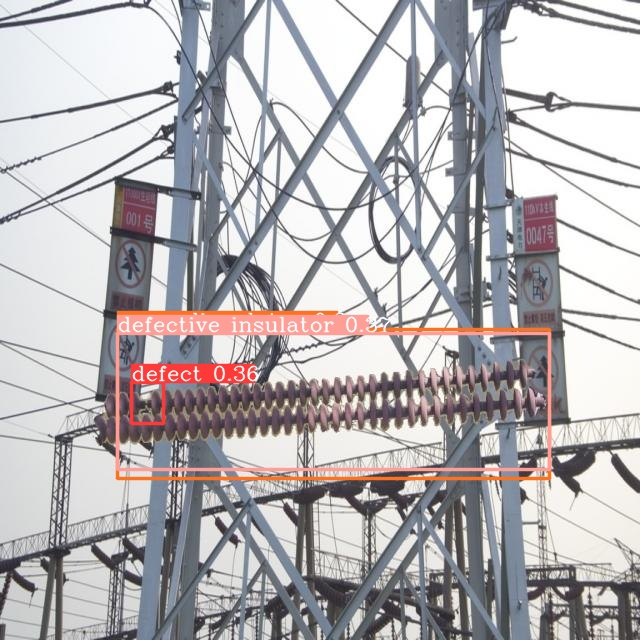

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/052_jpg.rf.41764b90e9cf58295e21362ae2a1208e.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
import cv2
import os
import random
label_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels'
raw_images_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images'
save_images_folder = r'/content/YOLOv6/save_images_valid'
name_list_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid'
classes_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2'
image_name=r'./runs/inference/exp/052_jpg.rf.41764b90e9cf58295e21362ae2a1208e.jpg'
label=name_of_class='defect'

def plot_one_box(x, image, color=None, label=name_of_class,line_thickness=None):

    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(str(label), 0, fontScale=tl / 3,thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, str(label), (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
def draw_box_on_image(image_name, classes_path, label_folder, raw_images_folder, save_images_folder ):
    txt_path  = r"/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid/052_jpg.rf.41764b90e9cf58295e21362ae2a1208e.txt"
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = r"./runs/inference/exp/052_jpg.rf.41764b90e9cf58295e21362ae2a1208e.jpg"
    save_file_path = r"/content/YOLOv6/save_images_valid/052"
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0
    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])
        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)
        plot_one_box([x1,y1,x2,y2], image,  label=name_of_class, line_thickness=None)
        cv2.imwrite(r"/content/YOLOv6/save_images_valid/052.jpg",image)
        box_number += 1
        return box_number
draw_box_on_image(image_name, classes_path,  label_folder, raw_images_folder, save_images_folder )





./runs/inference/exp/052_jpg.rf.41764b90e9cf58295e21362ae2a1208e.jpg


1

In [ ]:
!python tools/infer.py  --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt   --source {dataset.location}/images/valid/095_jpg.rf.59ffc9c87b34202f2657f2788bbcea44.jpg   --device 0 --conf-thres 0.34

Namespace(agnostic_nms=False, classes=None, conf_thres=0.34, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images/valid/095_jpg.rf.59ffc9c87b34202f2657f2788bbcea44.jpg', view_img=False, webcam=False, webcam_addr='0', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # t

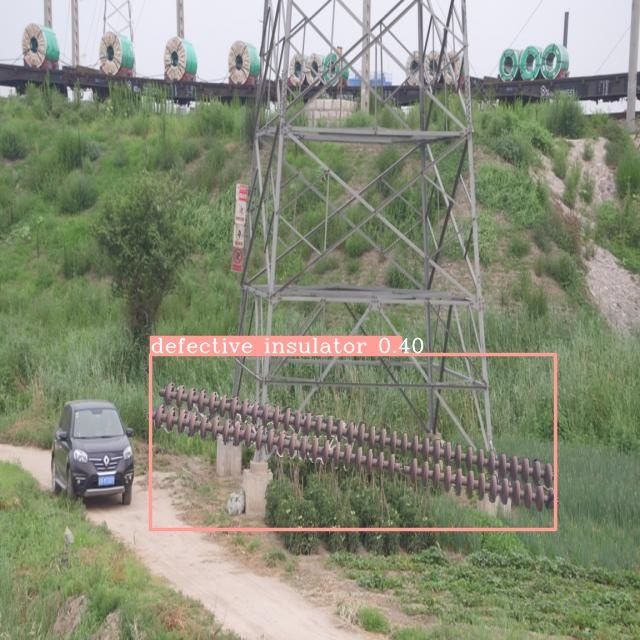

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/095_jpg.rf.59ffc9c87b34202f2657f2788bbcea44.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
import cv2
import os
import random
label_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels'
raw_images_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images'
save_images_folder = r'/content/YOLOv6/save_images_valid'
name_list_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid'
classes_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2'
image_name=r'./runs/inference/exp/095_jpg.rf.59ffc9c87b34202f2657f2788bbcea44.jpg'
label=name_of_class='defect'

def plot_one_box(x, image, color=None, label=name_of_class,line_thickness=None):

    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(str(label), 0, fontScale=tl / 3,thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, str(label), (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
def draw_box_on_image(image_name, classes_path, label_folder, raw_images_folder, save_images_folder ):
    txt_path  = r"/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid/095_jpg.rf.59ffc9c87b34202f2657f2788bbcea44.txt"
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = r"./runs/inference/exp/095_jpg.rf.59ffc9c87b34202f2657f2788bbcea44.jpg"
    save_file_path = r"/content/YOLOv6/save_images_valid/095"
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0
    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])
        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)
        plot_one_box([x1,y1,x2,y2], image,  label=name_of_class, line_thickness=None)
        cv2.imwrite(r"/content/YOLOv6/save_images_valid/095.jpg",image)
        box_number += 1
        return box_number
draw_box_on_image(image_name, classes_path,  label_folder, raw_images_folder, save_images_folder )





./runs/inference/exp/095_jpg.rf.59ffc9c87b34202f2657f2788bbcea44.jpg


1

In [ ]:
!python tools/infer.py  --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt   --source {dataset.location}/images/valid/135_jpg.rf.82b2536118c7f4bbd336790f975f8642.jpg   --device 0 --conf-thres 0.2

Namespace(agnostic_nms=False, classes=None, conf_thres=0.2, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images/valid/135_jpg.rf.82b2536118c7f4bbd336790f975f8642.jpg', view_img=False, webcam=False, webcam_addr='0', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # ty

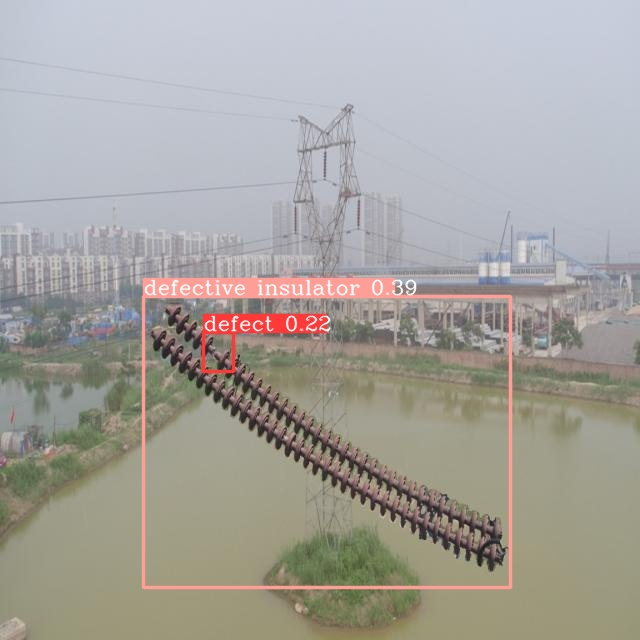

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/135_jpg.rf.82b2536118c7f4bbd336790f975f8642.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
import cv2
import os
import random
label_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels'
raw_images_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images'
save_images_folder = r'/content/YOLOv6/save_images_valid'
name_list_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid'
classes_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2'
image_name=r'./runs/inference/exp/135_jpg.rf.82b2536118c7f4bbd336790f975f8642.jpg'
label=name_of_class='defect'

def plot_one_box(x, image, color=None, label=name_of_class,line_thickness=None):

    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(str(label), 0, fontScale=tl / 3,thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, str(label), (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
def draw_box_on_image(image_name, classes_path, label_folder, raw_images_folder, save_images_folder ):
    txt_path  = r"/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid/135_jpg.rf.82b2536118c7f4bbd336790f975f8642.txt"
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = r"./runs/inference/exp/135_jpg.rf.82b2536118c7f4bbd336790f975f8642.jpg"
    save_file_path = r"/content/YOLOv6/save_images_valid/135"
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0
    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])
        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)
        plot_one_box([x1,y1,x2,y2], image,  label=name_of_class, line_thickness=None)
        cv2.imwrite(r"/content/YOLOv6/save_images_valid/135.jpg",image)
        box_number += 1
        return box_number
draw_box_on_image(image_name, classes_path,  label_folder, raw_images_folder, save_images_folder )





./runs/inference/exp/135_jpg.rf.82b2536118c7f4bbd336790f975f8642.jpg


1

In [ ]:
!python tools/infer.py  --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt   --source {dataset.location}/images/valid/239_jpg.rf.4e3e2a81f96304fd84a964c34a2e1c49.jpg  --device 0 --conf-thres 0.2

Namespace(agnostic_nms=False, classes=None, conf_thres=0.2, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images/valid/239_jpg.rf.4e3e2a81f96304fd84a964c34a2e1c49.jpg', view_img=False, webcam=False, webcam_addr='0', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # ty

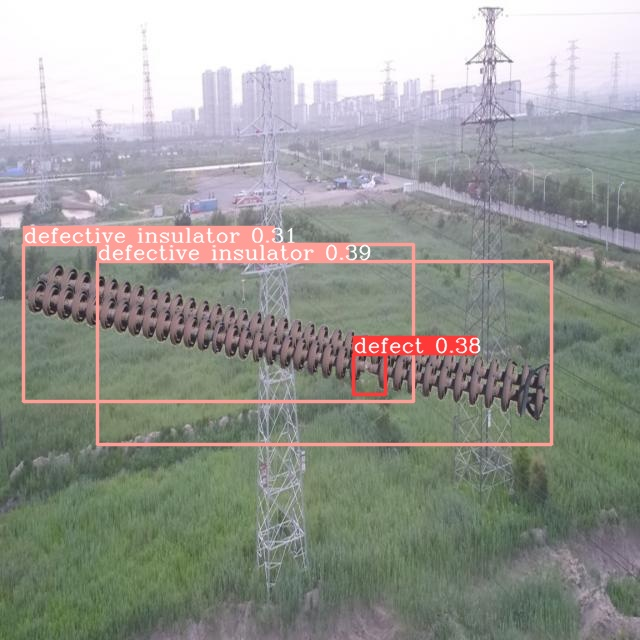

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/239_jpg.rf.27d2c3f42fd4b48a9bee6874d4d4ceb6.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
import cv2
import os
import random
label_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels'
raw_images_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images'
save_images_folder = r'/content/YOLOv6/save_images_valid'
name_list_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid'
classes_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2'
image_name=r'./runs/inference/exp/239_jpg.rf.27d2c3f42fd4b48a9bee6874d4d4ceb6.jpg'
label=name_of_class='defective insulator'

def plot_one_box(x, image, color=None, label=name_of_class,line_thickness=None):

    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(str(label), 0, fontScale=tl / 3,thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, str(label), (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
def draw_box_on_image(image_name, classes_path, label_folder, raw_images_folder, save_images_folder ):
    txt_path  = r"/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid/239_jpg.rf.4e3e2a81f96304fd84a964c34a2e1c49.txt"
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = r"./runs/inference/exp/239_jpg.rf.27d2c3f42fd4b48a9bee6874d4d4ceb6.jpg"
    save_file_path = r"/content/YOLOv6/save_images_valid/239"
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0
    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])
        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)
        plot_one_box([x1,y1,x2,y2], image,  label=name_of_class, line_thickness=None)
        cv2.imwrite(r"/content/YOLOv6/save_images_valid/239.jpg",image)
        box_number += 1
        return box_number
draw_box_on_image(image_name, classes_path,  label_folder, raw_images_folder, save_images_folder )





./runs/inference/exp/239_jpg.rf.27d2c3f42fd4b48a9bee6874d4d4ceb6.jpg


1

In [ ]:
!python tools/infer.py  --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt   --source {dataset.location}/images/valid/1546_jpg.rf.01fecf36708c0dfd4afa727e1758a6da.jpg   --device 0 --conf-thres 0.2

Namespace(agnostic_nms=False, classes=None, conf_thres=0.2, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images/valid/1546_jpg.rf.01fecf36708c0dfd4afa727e1758a6da.jpg', view_img=False, webcam=False, webcam_addr='0', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # t

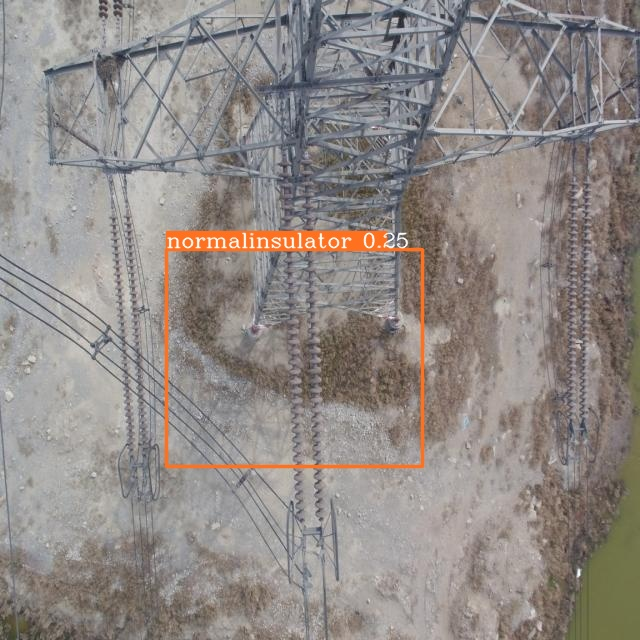

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/1546_jpg.rf.01fecf36708c0dfd4afa727e1758a6da.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
import cv2
import os
import random
label_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels'
raw_images_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images'
save_images_folder = r'/content/YOLOv6/save_images_valid'
name_list_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid'
classes_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2'
image_name=r'./runs/inference/exp/1546_jpg.rf.01fecf36708c0dfd4afa727e1758a6da.jpg'
label=name_of_class='normalinsulator'

def plot_one_box(x, image, color=None, label=name_of_class,line_thickness=None):

    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(str(label), 0, fontScale=tl / 3,thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, str(label), (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
def draw_box_on_image(image_name, classes_path, label_folder, raw_images_folder, save_images_folder ):
    txt_path  = r"/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid/1546_jpg.rf.01fecf36708c0dfd4afa727e1758a6da.txt"
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = r"./runs/inference/exp/1546_jpg.rf.01fecf36708c0dfd4afa727e1758a6da.jpg"
    save_file_path = r"/content/YOLOv6/save_images_valid/1546"
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0
    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])
        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)
        plot_one_box([x1,y1,x2,y2], image,  label=name_of_class, line_thickness=None)
        cv2.imwrite(r"/content/YOLOv6/save_images_valid/1546.jpg",image)
        box_number += 1
        return box_number
draw_box_on_image(image_name, classes_path,  label_folder, raw_images_folder, save_images_folder )





./runs/inference/exp/1546_jpg.rf.01fecf36708c0dfd4afa727e1758a6da.jpg


1

In [ ]:
!python tools/infer.py  --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt   --source {dataset.location}/images/valid/006_jpg.rf.fcd2c9ee2f5b8a125e62a21ea568146c.jpg  --device 0 --conf-thres 0.39

Namespace(agnostic_nms=False, classes=None, conf_thres=0.39, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images/valid/006_jpg.rf.fcd2c9ee2f5b8a125e62a21ea568146c.jpg', view_img=False, webcam=False, webcam_addr='0', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # t

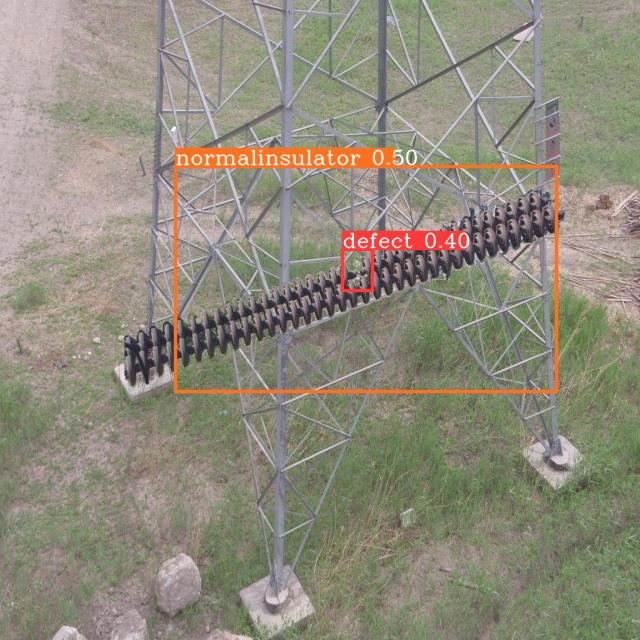

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/006_jpg.rf.fcd2c9ee2f5b8a125e62a21ea568146c.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
import cv2
import os
import random
label_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels'
raw_images_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images'
save_images_folder = r'/content/YOLOv6/save_images_valid'
name_list_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid'
classes_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2'
image_name=r'./runs/inference/exp/006_jpg.rf.fcd2c9ee2f5b8a125e62a21ea568146c.jpg'
label=name_of_class='defect'

def plot_one_box(x, image, color=None, label=name_of_class,line_thickness=None):

    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(str(label), 0, fontScale=tl / 3,thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, str(label), (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
def draw_box_on_image(image_name, classes_path, label_folder, raw_images_folder, save_images_folder ):
    txt_path  = r"/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid/006_jpg.rf.fcd2c9ee2f5b8a125e62a21ea568146c.txt"
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = r"./runs/inference/exp/006_jpg.rf.fcd2c9ee2f5b8a125e62a21ea568146c.jpg"
    save_file_path = r"/content/YOLOv6/save_images_valid/006"
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0
    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])
        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)
        plot_one_box([x1,y1,x2,y2], image,  label=name_of_class, line_thickness=None)
        cv2.imwrite(r"/content/YOLOv6/save_images_valid/006.jpg",image)
        box_number += 1
        return box_number
draw_box_on_image(image_name, classes_path,  label_folder, raw_images_folder, save_images_folder )





./runs/inference/exp/006_jpg.rf.fcd2c9ee2f5b8a125e62a21ea568146c.jpg


1

In [ ]:
!python tools/infer.py  --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt   --source {dataset.location}/images/valid/022_jpg.rf.faa248039eb36ba9bf850ef979715247.jpg   --device 0 --conf-thres 0.45

Namespace(agnostic_nms=False, classes=None, conf_thres=0.45, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images/valid/022_jpg.rf.faa248039eb36ba9bf850ef979715247.jpg', view_img=False, webcam=False, webcam_addr='0', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # t

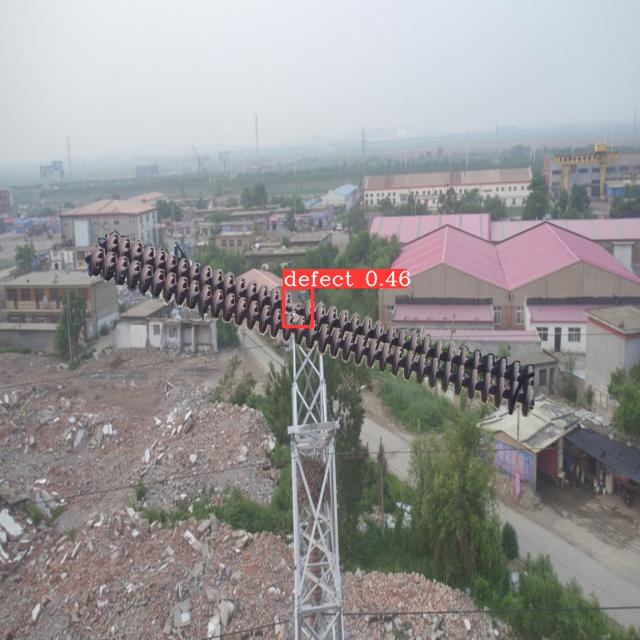

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/022_jpg.rf.faa248039eb36ba9bf850ef979715247.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
import cv2
import os
import random
label_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels'
raw_images_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images'
save_images_folder = r'/content/YOLOv6/save_images_valid'
name_list_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid'
classes_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2'
image_name=r'./runs/inference/exp/022_jpg.rf.faa248039eb36ba9bf850ef979715247.jpg'
label=name_of_class='defective insulator'

def plot_one_box(x, image, color=None, label=name_of_class,line_thickness=None):

    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(str(label), 0, fontScale=tl / 3,thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, str(label), (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
def draw_box_on_image(image_name, classes_path, label_folder, raw_images_folder, save_images_folder ):
    txt_path  = r"/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid/022_jpg.rf.faa248039eb36ba9bf850ef979715247.txt"
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = r"./runs/inference/exp/022_jpg.rf.faa248039eb36ba9bf850ef979715247.jpg"
    save_file_path = r"/content/YOLOv6/save_images_valid/022"
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0
    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])
        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)
        plot_one_box([x1,y1,x2,y2], image,  label=name_of_class, line_thickness=None)
        cv2.imwrite(r"/content/YOLOv6/save_images_valid/022.jpg",image)
        box_number += 1
        return box_number
draw_box_on_image(image_name, classes_path,  label_folder, raw_images_folder, save_images_folder )





./runs/inference/exp/022_jpg.rf.faa248039eb36ba9bf850ef979715247.jpg


1

In [ ]:
!python tools/infer.py  --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt   --source {dataset.location}/images/valid/1507_jpg.rf.da7a93ba9014a362cba2645b218478dd.jpg   --device 0 --conf-thres 0.42

Namespace(agnostic_nms=False, classes=None, conf_thres=0.42, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images/valid/1507_jpg.rf.da7a93ba9014a362cba2645b218478dd.jpg', view_img=False, webcam=False, webcam_addr='0', weights='runs/train/exp/weights/best_ckpt.pt', yaml='/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # 

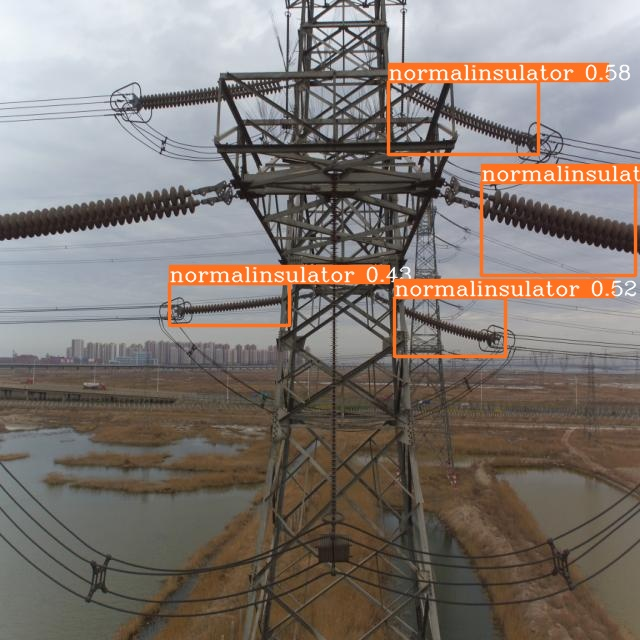

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/1507_jpg.rf.da7a93ba9014a362cba2645b218478dd.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
import cv2
import os
import random
label_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels'
raw_images_folder = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/images'
save_images_folder = r'/content/YOLOv6/save_images_valid'
name_list_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid'
classes_path = r'/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2'
image_name=r'./runs/inference/exp/1507_jpg.rf.da7a93ba9014a362cba2645b218478dd.jpg'
label=name_of_class='normalinsulator'

def plot_one_box(x, image, color=None, label=name_of_class,line_thickness=None):

    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(str(label), 0, fontScale=tl / 3,thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, str(label), (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
def draw_box_on_image(image_name, classes_path, label_folder, raw_images_folder, save_images_folder ):
    txt_path  = r"/content/YOLOv6/Normal-Insulator,-Defect-Insulator,-Defects--1-2/labels/valid/1507_jpg.rf.da7a93ba9014a362cba2645b218478dd.txt"
    print(image_name)
    if image_name == '.DS_Store':
        return 0
    image_path = r"./runs/inference/exp/1507_jpg.rf.da7a93ba9014a362cba2645b218478dd.jpg"
    save_file_path = r"/content/YOLOv6/save_images_valid/1507"
    source_file = open(txt_path) if os.path.exists(txt_path) else []
    image = cv2.imread(image_path)
    try:
        height, width, channels = image.shape
    except:
        print('no shape info.')
        return 0
    box_number = 0
    for line in source_file:
        staff = line.split()
        class_idx = int(staff[0])
        x_center, y_center, w, h = float(staff[1])*width, float(staff[2])*height, float(staff[3])*width, float(staff[4])*height
        x1 = round(x_center-w/2)
        y1 = round(y_center-h/2)
        x2 = round(x_center+w/2)
        y2 = round(y_center+h/2)
        plot_one_box([x1,y1,x2,y2], image,  label=name_of_class, line_thickness=None)
        cv2.imwrite(r"/content/YOLOv6/save_images_valid/1507.jpg",image)
        box_number += 1
        return box_number
draw_box_on_image(image_name, classes_path,  label_folder, raw_images_folder, save_images_folder )





./runs/inference/exp/1507_jpg.rf.da7a93ba9014a362cba2645b218478dd.jpg


1